# Liver Disease Predictor

In [2]:
# Important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Modeling libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
df = pd.read_csv('liver_disease_data.csv')

In [4]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
# Check for Categorical Data
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Dataset'] = df['Dataset'].replace(2,0)

In [6]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [8]:
# Identifying the Missing Values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
# Handling the Missing Values
df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].mean(), inplace = True)
df = df.fillna(method='ffill')

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [11]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


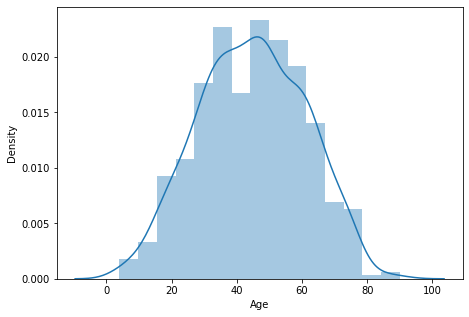

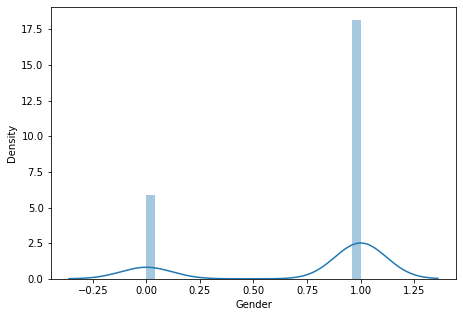

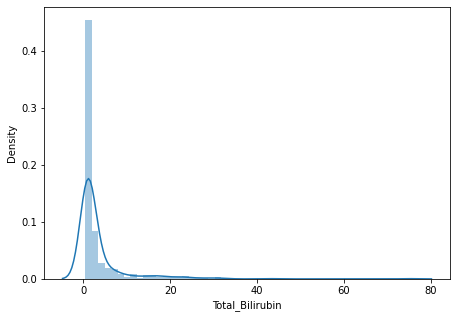

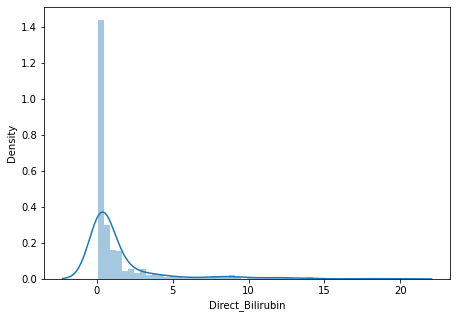

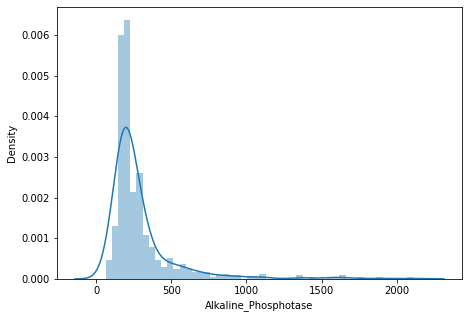

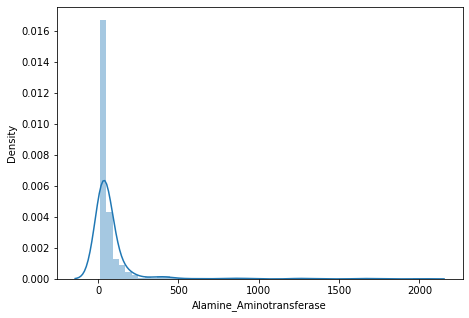

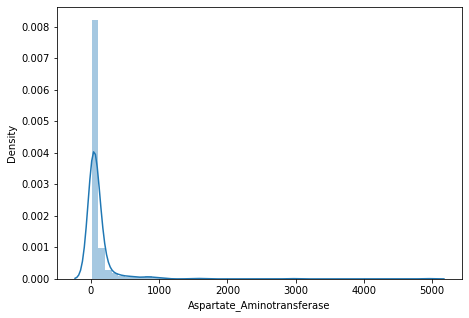

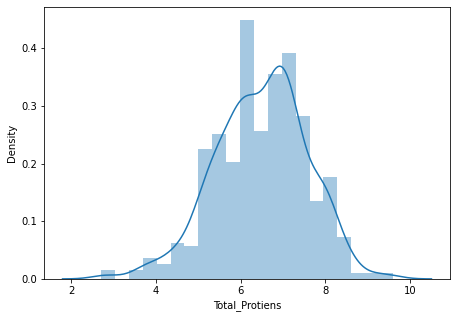

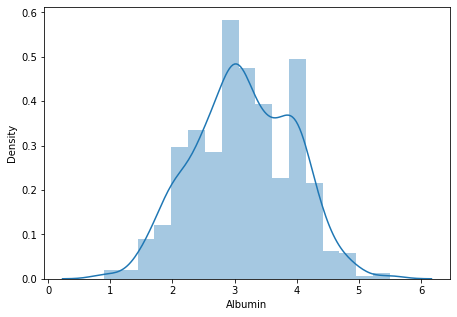

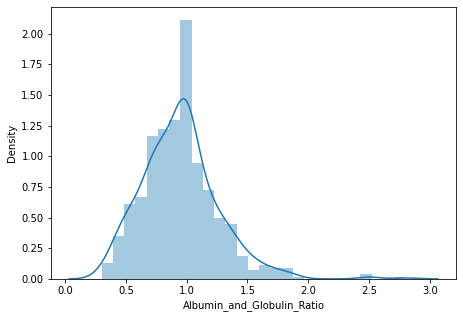

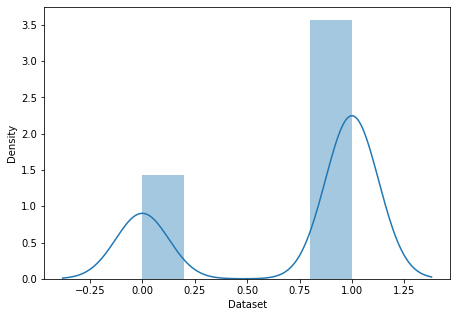

In [12]:
# Outlier Detection
for col in df.columns:
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.show()

In [13]:
# Outlier Detection and Removal
for col in df.columns:
    if col in ['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))
        

In [14]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.065978,1.386141,279.651551,69.539144,97.535160,6.485215,3.141852,0.943475,0.713551
std,16.189833,0.429603,4.845322,2.378096,188.905335,106.839450,164.832774,1.078940,0.795519,0.303222,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,3.226836,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,21.927364,9.911599,1019.390297,628.574619,976.666393,9.600000,5.500000,1.902540,1.000000


In [15]:
# Checking class balance
df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

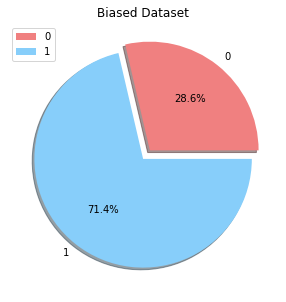

In [16]:
plt.figure(figsize=(5,5))
pie_labels=["0","1"]
pie_list=[df[df['Dataset']==0].shape[0],df[df['Dataset']==1].shape[0]]
colors = ['lightcoral', 'lightskyblue']
plt.pie(pie_list,labels=pie_labels, colors=colors,shadow=True,autopct="%1.1f%%", explode=(0.1,0))
plt.legend()
plt.title("Biased Dataset")
plt.show()

In [17]:
# Separating Features and Label
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [21]:
# Balancing Classes
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=10)
X_res,y_res=os.fit_resample(X,Y)
print(type(y_res))

<class 'numpy.ndarray'>


In [22]:
X_res.shape,y_res.shape

((832, 10), (832,))

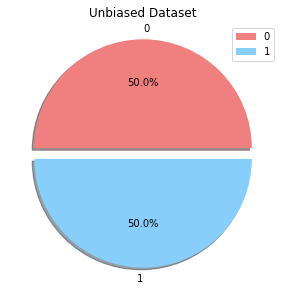

In [23]:
df_y = pd.DataFrame({ 'Dataset': np.array(y_res) })
plt.figure(figsize=(5,5))
pie_labels=["0","1"]
pie_list=[df_y[df_y['Dataset']==0].shape[0],df_y[df_y['Dataset']==1].shape[0]]
colors = ['lightcoral', 'lightskyblue']
plt.pie(pie_list,labels=pie_labels, colors=colors,shadow=True,autopct="%1.1f%%", explode=(0.1,0))

plt.legend()
plt.title("Unbiased Dataset")
plt.show()

In [24]:
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_res, y_res)
print(model.feature_importances_)

[0.1028279  0.02956727 0.12814024 0.11144302 0.12596507 0.1231593
 0.11703822 0.08304127 0.09469121 0.08412649]


In [25]:
feature_importance = pd.DataFrame(model.feature_importances_)
lst=list(feature_importance.sort_values(0,ascending=False).head(8).index)
lst.sort()
lst

[0, 2, 3, 4, 5, 6, 8, 9]

In [26]:
X = X_res[:,lst]

In [27]:
for i in lst:
    print(df.columns[i])

Age
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Albumin
Albumin_and_Globulin_Ratio


In [28]:
# Split the Training Set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [29]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (665, 8)
X_test shape: (167, 8)
Y_train shape: (665,)
Y_test shape: (167,)


In [30]:
def evaluate_model(models):
   
    result_train = []
    result_test = []
    for model in models :
        trained_model = model.fit(X_train, Y_train)
        Y_pred = trained_model.predict(X_test)
        accuracy_test = accuracy_score(Y_test, Y_pred)
        accuracy_train = accuracy_score(Y_train, trained_model.predict(X_train))
        result_train.append(round((accuracy_train*100),2))
        result_test.append(round((accuracy_test*100),2))
        

    result_df = pd.DataFrame({
        "Accuracy Training Set":result_train,
        "Accuracy Testing Set":result_test,
        "Models":[
            "Logistic Regression",
            "Decision Tree Classifier",
            "AdaBoost Classifier",
            "Support Vector Machine",
            "Random Forest Classifier",
            "Gradient Boosting Classifier",
            "XGBoost",
            "Naive Bayes",
            "K-Nearest Neighbors Classifier",
            "LightGBM"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "Accuracy Testing Set", y = "Models", data = result_df, orient = "h",order=result_df.sort_values('Accuracy Testing Set',ascending = False).Models.head())
    bar.set_xlabel("Accuracy")
    bar.set_title("Liver Disease Dataset Accuracy Scores")
    return result_df.sort_values('Accuracy Testing Set',ascending = False)

,Accuracy Training Set,Accuracy Testing Set,Models
4,100.00,89.22,Random Forest Classifier
6,100.00,88.02,XGBoost
9,100.00,86.83,LightGBM
1,100.00,82.04,Decision Tree Classifier
5,92.33,81.44,Gradient Boosting Classifier
2,81.50,76.65,AdaBoost Classifier
8,85.11,74.25,K-Nearest Neighbors Classifier
7,67.22,73.05,Naive Bayes
0,69.62,70.06,Logistic Regression
3,66.17,67.66,Support Vector Machine


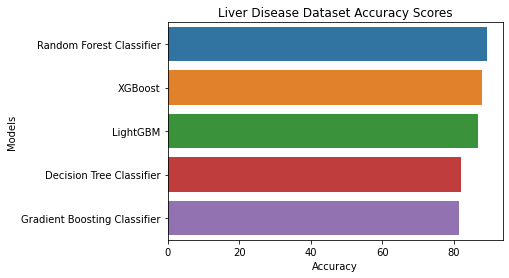

In [31]:
# Modeling: Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(n_estimators=50,learning_rate=1),
    SVC(),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(eval_metric='logloss'),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    lgb.LGBMClassifier()
]
evaluate_model(models)

Accuracy: 89.22%
Precision: 0.9
Recall: 0.85
F1 Score: 0.88


Text(16.5, 0.5, 'Predicted Label')

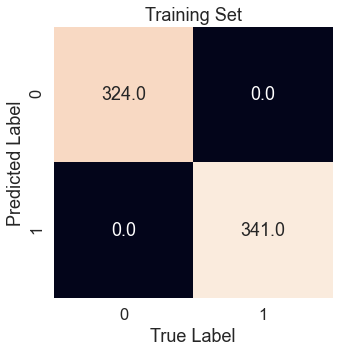

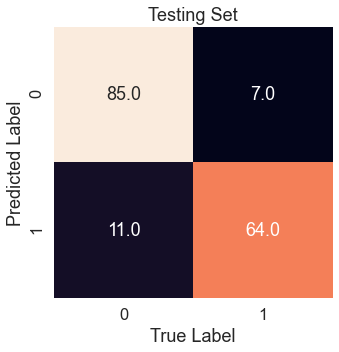

In [32]:
# Best Performing Model
classifier = RandomForestClassifier(random_state = 30)
model = classifier.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred2 = model.predict(X_train)

# Evaluating using metrics
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
f1 = metrics.f1_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
print("Accuracy: " + str(round((accuracy*100),2))+"%")
print("Precision: " + str(round((precision),2)))
print("Recall: " + str(round((recall),2)))
print("F1 Score: " + str(round((f1),2)))

# Confusion Matrix
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_train, Y_pred2),annot=True,cbar=False,fmt=".1f")
plt.title('Training Set')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False,fmt=".1f")
plt.title('Testing Set')
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

## Hyperparameter Tuning

### Decision Tree

In [30]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [32]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

tuning = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5},
 0.738384676430272)

In [31]:
classifier=DecisionTreeClassifier(max_depth= 5,min_samples_leaf=5,criterion='gini')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.7245508982035929


### Support Vector Machine

In [32]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly'],
             'degree': [0, 1, 2, 3, 4, 5, 6]}
 
tuning=GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=2,verbose=1,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 2 folds for each of 525 candidates, totalling 1050 fits


In [33]:
classifier=SVC(C=1000,gamma=1,kernel='rbf',degree=0,random_state=10)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8862275449101796


### Naive Bayes

In [34]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [ ]:
param_grid={'var_smoothing': np.logspace(0,-9, num=100)}
tuning=GridSearchCV(estimator=GaussianNB(), param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

In [35]:
classifier=GaussianNB(var_smoothing=0.001)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.6766467065868264


### KNN

In [36]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [ ]:
param_grid =[ { 'n_neighbors' : range(0,20,1),
               'algorithm':['auto','ball_tree','kd_tree','brute'],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
              'p':[0,1,2,3]}]
tuning=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

In [37]:
classifier=KNeighborsClassifier(algorithm='auto',metric= 'minkowski',n_neighbors=1,p=2,weights='uniform')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8203592814371258


### Logistic Regression

In [38]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
tuning = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, verbose = True, cv=5, n_jobs = -1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

In [39]:
classifier=LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l1', solver= 'saga')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.592814371257485


### Random Forest

In [40]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [ ]:
param_grid={'n_estimators':range(80,201,5),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2',None]}

tuning=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

In [41]:
classifier=KNeighborsClassifier(algorithm='auto',metric= 'minkowski',n_neighbors=1,p=2,weights='uniform')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8203592814371258


## Final Model

In [33]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

Accuracy: 90.42%
Precision: 0.904
Recall: 0.88
F1 Score: 0.892


Text(16.5, 0.5, 'Predicted Label')

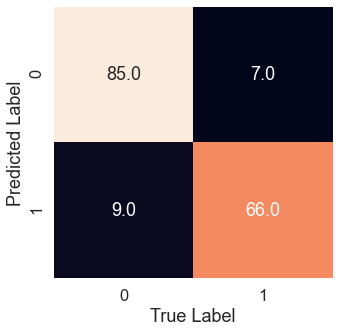

In [34]:
classifier=RandomForestClassifier(n_estimators=110,criterion='gini',max_features='sqrt',random_state=30)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, y_pred)
f1 = metrics.f1_score(Y_test, y_pred)
recall = metrics.recall_score(Y_test, y_pred)
precision = metrics.precision_score(Y_test, y_pred)
print("Accuracy: " + str(round((accuracy*100),2))+"%")
print("Precision: " + str(round((precision),3)))
print("Recall: " + str(round((recall),3)))
print("F1 Score: " + str(round((f1),3)))

sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cbar=False,fmt=".1f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [37]:
print(model)

RandomForestClassifier(n_estimators=110, random_state=30)


In [36]:
# Saving Model with pickle
import pickle
pickle.dump(model,open(r'liver_disease_model.pkl','wb'))